In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from Kmeans import KMeans as myKMeans
from sklearn.cluster import KMeans as skKMeans

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [2]:
# Load the data
data = pd.read_csv('../data/penguins.csv')
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


Datset info

In [3]:
print('Before preprocessing:')
print('# missing values:', np.sum(data.isnull().sum()))
print('# rows:', data.shape[0])
print('# fetaures:', data.shape[1])
print('max value:', data.drop('sex', axis=1).max().max())
print('min value:', data.drop('sex', axis=1).min().min()) 

Before preprocessing:
# missing values: 17
# rows: 344
# fetaures: 5
max value: 6300.0
min value: -132.0


In [4]:
# Preprocessing

# drop rows containing missing values or NaNs
data = data.dropna()
data = data.drop_duplicates()
data = data[(data['sex'] == 'MALE') | (data['sex'] == 'FEMALE')]

print('# missing values:', np.sum(data.isnull().sum()))

# encode the sex column to 0s and 1s
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])

print(data['sex'].unique())

data.head()

# missing values: 0
[1 0]


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1


In [5]:
# Reset the index before scaling
data = data.reset_index(drop=True)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('sex', axis=1)) # drop categorical column

# Create a new DataFrame to add back the 'sex' column
scaled_df = pd.DataFrame(scaled_data, columns=data.columns[:-1])
scaled_df['sex'] = data['sex']

X = scaled_df.to_numpy()

scaled_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.896113,0.774517,-0.126674,-0.569485,1
1,-0.822764,0.114726,-0.107681,-0.507204,0
2,-0.676065,0.419245,-0.073493,-1.192302,0
3,-1.336209,1.079036,-0.081090,-0.943175,0
4,-0.859439,1.738827,-0.092486,-0.694049,1


In [6]:
def plot_clusters(X, labels, centroids, title, i):
    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5, label='Data Points')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, linewidths=3, label='Centroids')
    plt.title(title)

In [9]:
import warnings # suppress warnings (Not important for the task)
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster")

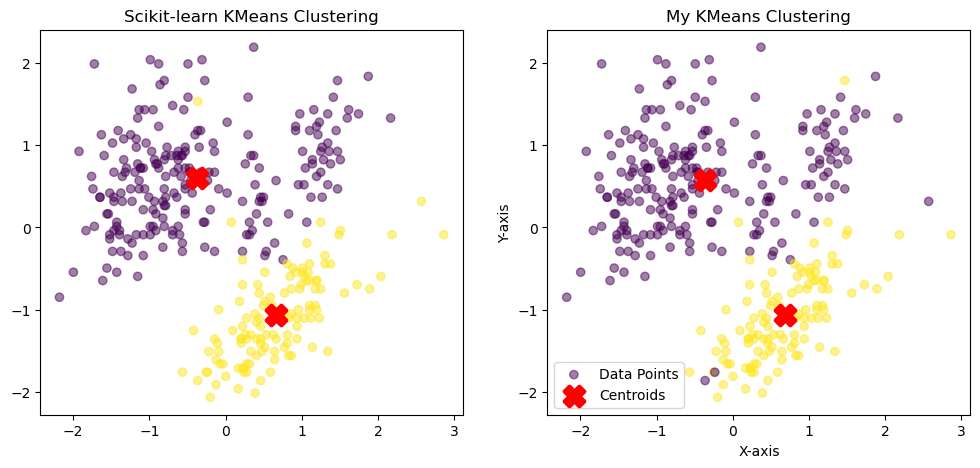

In [10]:
# Scikit-learn's KMeans
kmeans = skKMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# My KMeans
my_kmeans = myKMeans(n_clusters=2, random_state=42)
my_kmeans.fit(X)

# Compare the results
plt.figure(figsize=(12, 5))
plot_clusters(X, kmeans.labels_, kmeans.cluster_centers_, 'Scikit-learn KMeans Clustering', 0)
plot_clusters(X, my_kmeans.labels_, my_kmeans.centroids, 'My KMeans Clustering', 1)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()